# Evaluating the Scores

In [15]:
import pandas as pd
import os
import cleanup as cl

df_questions_table = pd.read_csv('data/questions.csv')
df_prompted_table = pd.read_csv('data/prompted.csv',index_col='id', low_memory=False)
df_unprompted_table = pd.read_csv('data/unprompted.csv',low_memory=False)
df_no_assistance_table = pd.read_csv('data/noassistance.csv',low_memory=False)
df_feedback_ques = pd.read_csv('data/feedback.csv',low_memory=False)
df_feedback_ans = pd.read_csv('data/feedbackans.csv',low_memory=False)
user_data_df = pd.read_csv('data/users.csv')

Get correct the correct answers from questions table to evaluate the scores

In [38]:
option_mapping = {
    'op1': 'A',
    'op2': 'B',
    'op3': 'C',
    'op4': 'D',
}

correct_answers_mapped = []

for index, row in df_questions_table.iterrows():
    for option, letter in option_mapping.items():
        if row[option] == row['ans']:
            correct_answers_mapped.append(letter)
            break

print(correct_answers_mapped)

['A', 'C', 'D', 'D', 'D', 'D', 'C', 'B', 'C', 'C', 'C', 'B']


In [39]:
prompted_df = cl.select_latest_data(df_prompted_table)
prompted_df = cl.find_date_time_diff(prompted_df)
prompted_df = cl.remove_incomplete(prompted_df)
prompted_df = cl.extract_answers(prompted_df)

In [40]:
prompted_df.head(n=25)

,user,action,page,time,date,date_diff
0,123,A,1,14:49:37,2024-05-08 00:19:45.097927+05:30,0 days 00:00:08.009769
1,123,D,2,14:49:47,2024-05-08 00:19:49.937423+05:30,0 days 00:00:02.640237
2,123,D,3,14:49:50,2024-05-08 00:19:53.685448+05:30,0 days 00:00:03.227736
3,123,D,4,14:49:54,2024-05-08 00:19:56.849314+05:30,0 days 00:00:02.383237
4,123,D,5,14:49:57,2024-05-08 00:20:00.181939+05:30,0 days 00:00:02.792755
5,123,D,6,14:50:00,2024-05-08 00:20:02.872984+05:30,0 days 00:00:02.059988
6,123,B,7,14:50:03,2024-05-08 00:20:10.729217+05:30,0 days 00:00:07.448153
7,123,B,8,14:50:11,2024-05-08 00:20:19.864851+05:30,0 days 00:00:08.563434
8,123,C,9,14:50:20,2024-05-08 00:20:22.317307+05:30,0 days 00:00:01.411178
9,123,C,10,14:50:22,2024-05-08 00:20:26.353179+05:30,0 days 00:00:03.607881


# TODO
* Remove people who were too fast ( <5 minutes?) 
* calculate scores

In [41]:
prompted_df['date_diff'] = pd.to_timedelta(prompted_df['date_diff'])
filtered_df = prompted_df[prompted_df['page'].between(1, 12)]
total_time_by_user = filtered_df.groupby('user')['date_diff'].sum()
total_time_by_user_dict = total_time_by_user.to_dict()

# Converting timedelta to minutes
total_time_by_user_dict = {user: total_time.total_seconds() / 60 for user, total_time in total_time_by_user_dict.items()}

In [42]:
filtered_time_by_user_dict = {user: time for user, time in total_time_by_user_dict.items() if time >= 5}

filtered_time_by_user_dict

{'AA.SC.P2MCA210790': 5.75868115,
 'AA.SC.U3BCA2401005': 8.35318855,
 'AA.SC.U3BCA2401050': 14.590093933333332,
 'AA.SC.U3BCA2401059@ahead.students.amrita.edu': 16.714606149999998,
 'AA.SC.U3BCA2401080': 12.661227116666668,
 'AM.AI.U4AID23049': 7.366796633333333,
 'AM.BU.P2MBA23003': 6.341470583333333,
 'AM.BU.P2MBA23005': 5.236977766666667,
 'AM.BU.P2MBA23013': 8.679474016666667,
 'AM.BU.P2MBA23027': 9.6297865,
 'AM.BU.P2MBA23031': 5.917422650000001,
 'AM.BU.P2MBA23055': 20.089243766666666,
 'AM.EN.P2AML22001': 5.4406630499999995,
 'AM.EN.P2GEO21016': 5.276622266666666,
 'AM.EN.P2TF22001': 6.409562716666667,
 'AM.EN.U4CSE19326': 8.546770500000001,
 'AM.EN.U4CSE20309': 5.854024283333334,
 'AM.EN.U4ECE20008': 11.214614416666667,
 'AM.EN.U4RAE23032': 5.5632711,
 'AM.SC.U4AIE23111': 8.36579315,
 'AM.SC.U4AIE23151': 8.504848083333334,
 'AM.SC.U4CSE23138': 5.981940916666667,
 'AM.SC.U4CSE23302': 8.326406116666666,
 'AM.SC.U4CYS23002': 5.336411133333333,
 'AM.SC.U4CYS23020': 7.43200223333333

In [43]:
users_to_keep_list = list(filtered_time_by_user_dict.keys())

# Filter the DataFrame
prompted_filtered_df = prompted_df[prompted_df['user'].isin(users_to_keep_list)]

# Display the filtered DataFrame
prompted_filtered_df

,user,action,page,time,date,date_diff
120,AA.SC.P2MCA210790,B,1,18:40:52,2024-05-08 18:41:11.681728+05:30,0 days 00:00:13.988339
121,AA.SC.P2MCA210790,C,2,18:41:10,2024-05-08 18:41:27.178544+05:30,0 days 00:00:11.919626
122,AA.SC.P2MCA210790,D,3,18:41:24,2024-05-08 18:41:58.752014+05:30,0 days 00:00:28.809987
123,AA.SC.P2MCA210790,D,4,18:42:06,2024-05-08 18:43:14.594445+05:30,0 days 00:01:03.029092
124,AA.SC.P2MCA210790,B,5,18:43:10,2024-05-08 18:44:01.542053+05:30,0 days 00:00:45.800124
...,...,...,...,...,...,...
907,srilaxmi333,B,8,10:12:24,2024-04-30 10:12:47.334922+05:30,0 days 00:00:22.163060
908,srilaxmi333,C,9,10:12:47,2024-04-30 10:13:08.397221+05:30,0 days 00:00:19.967427
909,srilaxmi333,C,10,10:13:08,2024-04-30 10:13:34.178504+05:30,0 days 00:00:24.731546
910,srilaxmi333,C,11,10:13:34,2024-04-30 10:13:43.911560+05:30,0 days 00:00:08.469157


## Mapping the Actions of each user into a dictionary

In [44]:
prompted_action_user_mapping = {}

for index, row in prompted_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    
    # Check if the user is already in the dictionary
    if user in prompted_action_user_mapping:
        # If user is already in dictionary, append the current action to the existing list for that user
        prompted_action_user_mapping[user].append(action)
    else:
        # If the user is not in the dictionary, create a new entry with the action as a list
        prompted_action_user_mapping[user] = [action]
prompted_action_user_mapping

{'AA.SC.P2MCA210790': ['B',
  'C',
  'D',
  'D',
  'B',
  'D',
  'C',
  'B',
  'C',
  'C',
  'C',
  'B'],
 'AA.SC.U3BCA2401005': ['D',
  'D',
  'D',
  'D',
  'D',
  'B',
  'C',
  'C',
  'B',
  'B',
  'D',
  'B'],
 'AA.SC.U3BCA2401050': ['B',
  'D',
  'D',
  'A',
  'D',
  'B',
  'C',
  'B',
  'C',
  'C',
  'C',
  'B'],
 'AA.SC.U3BCA2401059@ahead.students.amrita.edu': ['A',
  'A',
  'D',
  'D',
  'D',
  'D',
  'C',
  'B',
  'C',
  'C',
  'C',
  'B'],
 'AA.SC.U3BCA2401080': ['A',
  'C',
  'D',
  'D',
  'B',
  'D',
  'B',
  'B',
  'C',
  'C',
  'C',
  'C'],
 'AM.AI.U4AID23049': ['B',
  'B',
  'D',
  'D',
  'B',
  'A',
  'C',
  'D',
  'C',
  'C',
  'C',
  'C'],
 'AM.BU.P2MBA23003': ['A',
  'C',
  'D',
  'D',
  'B',
  'D',
  'C',
  'B',
  'C',
  'C',
  'C',
  'B'],
 'AM.BU.P2MBA23005': ['A',
  'B',
  'D',
  'D',
  'D',
  'B',
  'B',
  'A',
  'A',
  'C',
  'D',
  'C'],
 'AM.BU.P2MBA23013': ['B',
  'C',
  'D',
  'A',
  'B',
  'B',
  'B',
  'B',
  'C',
  'C',
  'D',
  'B'],
 'AM.BU.P2MBA23027':

## Comparing results

In [45]:
prompted_comparison_results_by_user = {}

for user, actions in prompted_action_user_mapping.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    prompted_comparison_results_by_user[user] = user_comparison_results

prompted_comparison_results_by_user

{'AA.SC.P2MCA210790': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
 'AA.SC.U3BCA2401005': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
 'AA.SC.U3BCA2401050': [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
 'AA.SC.U3BCA2401059@ahead.students.amrita.edu': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'AA.SC.U3BCA2401080': [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
 'AM.AI.U4AID23049': [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
 'AM.BU.P2MBA23003': [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0],
 'AM.BU.P2MBA23005': [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
 'AM.BU.P2MBA23013': [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 'AM.BU.P2MBA23027': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'AM.BU.P2MBA23031': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 'AM.BU.P2MBA23055': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'AM.EN.P2AML22001': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
 'AM.EN.P2GEO21016': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 'AM.EN.P2TF22001': [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0],
 'AM.EN.U4CSE19326': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],


## Sum of Scores of each user

In [46]:
# sum of compared results for each user
prompted_sum_of_results_by_user = {}

for user, results in prompted_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    prompted_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

prompted_sum_of_results_by_user

{'AA.SC.P2MCA210790': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 'AA.SC.U3BCA2401005': {'CRT': 1, 'Basic Math': 1, 'Score': 2},
 'AA.SC.U3BCA2401050': {'CRT': 1, 'Basic Math': 3, 'Score': 4},
 'AA.SC.U3BCA2401059@ahead.students.amrita.edu': {'CRT': 7,
  'Basic Math': 5,
  'Score': 12},
 'AA.SC.U3BCA2401080': {'CRT': 5, 'Basic Math': 4, 'Score': 9},
 'AM.AI.U4AID23049': {'CRT': 3, 'Basic Math': 5, 'Score': 8},
 'AM.BU.P2MBA23003': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AM.BU.P2MBA23005': {'CRT': 4, 'Basic Math': 5, 'Score': 9},
 'AM.BU.P2MBA23013': {'CRT': 2, 'Basic Math': 3, 'Score': 5},
 'AM.BU.P2MBA23027': {'CRT': 7, 'Basic Math': 5, 'Score': 12},
 'AM.BU.P2MBA23031': {'CRT': 0, 'Basic Math': 3, 'Score': 3},
 'AM.BU.P2MBA23055': {'CRT': 7, 'Basic Math': 5, 'Score': 12},
 'AM.EN.P2AML22001': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AM.EN.P2GEO21016': {'CRT': 0, 'Basic Math': 3, 'Score': 3},
 'AM.EN.P2TF22001': {'CRT': 4, 'Basic Math': 2, 'Score': 6},
 'AM.EN.U4CSE19326': {'CRT': 

In [47]:
len(prompted_sum_of_results_by_user)

38

In [ ]:
average_score = sum(student['Score'] for student in prompted_sum_of_results_by_user.values()) / len(prompted_sum_of_results_by_user)

# Separate into high scorers and low scorers
prompted_high_scorers = {user: details for user, details in prompted_sum_of_results_by_user.items() if details['Score'] > average_score}
prompted_low_scorers = {user: details for user, details in prompted_sum_of_results_by_user.items() if details['Score'] <= average_score}

print(f"Average Score: {average_score}")
print("High Scorers:", prompted_high_scorers)
print("Low Scorers:", prompted_low_scorers)

Exporting the user_id and score to a CSV/Excel

In [48]:
df = pd.DataFrame.from_dict(prompted_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# Export to Excel
df.to_excel('prompted_scores.xlsx', index=False)

# Export to CSV
df.to_csv('prompted_scores.csv', index=False)

# Unprompted Analysis

In [49]:
unprompted_df = cl.select_latest_data(df_unprompted_table)
unprompted_df = cl.find_date_time_diff(unprompted_df)
unprompted_df = cl.remove_incomplete(unprompted_df)
unprompted_df = cl.extract_answers(unprompted_df)

In [50]:
unprompted_df.head(n=25)

,id,user,action,page,time,date,date_diff
0,16238.0,088,B,1,18:41:14,2024-05-08 18:40:50.299848+05:30,0 days 00:00:20.620279
1,16253.0,088,B,2,18:41:40,2024-05-08 18:41:19.025516+05:30,0 days 00:00:22.821842
2,16320.0,088,D,3,18:42:05,2024-05-08 18:43:16.764968+05:30,0 days 00:01:55.829180
3,16394.0,088,D,4,18:44:28,2024-05-08 18:45:08.824473+05:30,0 days 00:01:23.236958
4,16412.0,088,D,5,18:45:54,2024-05-08 18:45:30.916865+05:30,0 days 00:00:20.673605
5,16437.0,088,B,6,18:46:27,2024-05-08 18:46:10.518188+05:30,0 days 00:00:27.497670
6,16461.0,088,C,7,18:46:56,2024-05-08 18:47:19.507321+05:30,0 days 00:01:07.838044
7,16478.0,088,B,8,18:48:07,2024-05-08 18:47:58.697417+05:30,0 days 00:00:35.755862
8,16490.0,088,C,9,18:48:51,2024-05-08 18:48:18.742661+05:30,0 days 00:00:12.071362
9,16508.0,088,C,10,18:49:12,2024-05-08 18:48:57.694904+05:30,0 days 00:00:29.632320


In [51]:
unprompted_df['date_diff'] = pd.to_timedelta(unprompted_df['date_diff'])
filtered_unprompted_df = unprompted_df[unprompted_df['page'].between(1, 12)]
total_time_by_user = filtered_unprompted_df.groupby('user')['date_diff'].sum()
total_time_by_user_dict = total_time_by_user.to_dict()

# Converting timedelta to minutes
total_time_by_user_dict = {user: total_time.total_seconds() / 60 for user, total_time in total_time_by_user_dict.items()}

In [52]:
filtered_time_by_user_dict = {user: time for user, time in total_time_by_user_dict.items() if time >= 5}

filtered_time_by_user_dict

{'088': 8.6299055,
 '12345': 10.114505116666667,
 '170012541': 6.9685929,
 '220984002': 11.55197185,
 '221ADB150': 6.1011919,
 '221ADM090': 7.543025416666667,
 '2267107': 8.245153083333333,
 '23007': 9.86826795,
 '38': 5.222867783333333,
 '7376212BT801': 6.893494700000001,
 'AA.SC.P2MCA2207729': 5.439609116666667,
 'AA.SC.P2MCA2307403': 9.954255716666667,
 'AA.SC.U3BCA2207182': 9.253053933333332,
 'AA.SC.U3BCA2401031': 13.695326633333334,
 'AA.SC.U3CSC2107180': 8.819645816666668,
 'AA.SC.U3CSC2107303': 8.225392000000001,
 'AM.BU.P2MBA23004': 9.78730855,
 'AM.BU.P2MBA23006': 8.518526783333334,
 'AM.BU.P2MBA23007': 12.398980433333332,
 'AM.BU.P2MBA23009': 12.571012233333333,
 'AM.BU.P2MBA23011': 10.55826425,
 'AM.BU.P2MBA23014': 9.90568455,
 'AM.BU.P2MBA23017': 9.642809333333334,
 'AM.BU.P2MBA23032': 9.473553716666666,
 'AM.BU.P2MBA23035': 17.991070983333334,
 'AM.BU.P2MBA23039': 8.316520866666666,
 'AM.BU.P2MBA23047': 5.0954299,
 'AM.BU.P3MBA23053': 11.735940416666667,
 'AM.EN.P2CSN2200

In [53]:
users_to_keep_list = list(filtered_time_by_user_dict.keys())

# Filter the DataFrame
unprompted_filtered_df = unprompted_df[unprompted_df['user'].isin(users_to_keep_list)]

# Display the filtered DataFrame
unprompted_filtered_df

,id,user,action,page,time,date,date_diff
0,16238.0,088,B,1,18:41:14,2024-05-08 18:40:50.299848+05:30,0 days 00:00:20.620279
1,16253.0,088,B,2,18:41:40,2024-05-08 18:41:19.025516+05:30,0 days 00:00:22.821842
2,16320.0,088,D,3,18:42:05,2024-05-08 18:43:16.764968+05:30,0 days 00:01:55.829180
3,16394.0,088,D,4,18:44:28,2024-05-08 18:45:08.824473+05:30,0 days 00:01:23.236958
4,16412.0,088,D,5,18:45:54,2024-05-08 18:45:30.916865+05:30,0 days 00:00:20.673605
...,...,...,...,...,...,...,...
1133,14668.0,vicky,A,8,12:00:40,2024-05-03 12:00:50.369947+05:30,0 days 00:00:09.827728
1134,14670.0,vicky,A,9,12:00:51,2024-05-03 12:01:06.039901+05:30,0 days 00:00:14.375406
1135,14672.0,vicky,C,10,12:01:08,2024-05-03 12:01:38.554830+05:30,0 days 00:00:30.545984
1136,14674.0,vicky,C,11,12:01:44,2024-05-03 12:01:58.320139+05:30,0 days 00:00:14.285017



## Mapping the Actions of each user into a dictionary

In [54]:
unprompted_action_user_mapping = {}

for index, row in unprompted_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    
    # Check if the user is already in the dictionary
    if user in unprompted_action_user_mapping:
        # If user is already in dictionary, append the current action to the existing list for that user
        unprompted_action_user_mapping[user].append(action)
    else:
        # If the user is not in the dictionary, create a new entry with the action as a list
        unprompted_action_user_mapping[user] = [action]


## Comparing Results

In [55]:
unprompted_comparison_results_by_user = {}

for user, actions in unprompted_action_user_mapping.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    unprompted_comparison_results_by_user[user] = user_comparison_results



# Sum of Scores of each user

In [56]:
# sum of compared results for each user
unprompted_sum_of_results_by_user = {}

for user, results in unprompted_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    unprompted_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

unprompted_sum_of_results_by_user

{'088': {'CRT': 4, 'Basic Math': 3, 'Score': 7},
 '12345': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 '170012541': {'CRT': 0, 'Basic Math': 3, 'Score': 3},
 '220984002': {'CRT': 3, 'Basic Math': 0, 'Score': 3},
 '221ADB150': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 '221ADM090': {'CRT': 6, 'Basic Math': 4, 'Score': 10},
 '2267107': {'CRT': 7, 'Basic Math': 5, 'Score': 12},
 '23007': {'CRT': 0, 'Basic Math': 2, 'Score': 2},
 '38': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 '7376212BT801': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AA.SC.P2MCA2207729': {'CRT': 1, 'Basic Math': 3, 'Score': 4},
 'AA.SC.P2MCA2307403': {'CRT': 2, 'Basic Math': 2, 'Score': 4},
 'AA.SC.U3BCA2207182': {'CRT': 1, 'Basic Math': 1, 'Score': 2},
 'AA.SC.U3BCA2401031': {'CRT': 7, 'Basic Math': 5, 'Score': 12},
 'AA.SC.U3CSC2107180': {'CRT': 2, 'Basic Math': 5, 'Score': 7},
 'AA.SC.U3CSC2107303': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AM.BU.P2MBA23004': {'CRT': 3, 'Basic Math': 3, 'Score': 6},
 'AM.BU.P2MBA23006': 

In [57]:
len(unprompted_sum_of_results_by_user)

56

In [126]:
average_score = sum(student['Score'] for student in unprompted_sum_of_results_by_user.values()) / len(unprompted_sum_of_results_by_user)

# Separate into high scorers and low scorers
unprompted_high_scorers = {user: details for user, details in unprompted_sum_of_results_by_user.items() if details['Score'] > average_score}
unprompted_low_scorers = {user: details for user, details in unprompted_sum_of_results_by_user.items() if details['Score'] <= average_score}

print(f"Average Score: {average_score}")
print("High Scorers:", unprompted_high_scorers)
print("Low Scorers:", unprompted_low_scorers)

Average Score: 6.660714285714286
High Scorers: {'088': {'CRT': 4, 'Basic Math': 3, 'Score': 7}, '12345': {'CRT': 5, 'Basic Math': 3, 'Score': 8}, '221ADM090': {'CRT': 6, 'Basic Math': 4, 'Score': 10}, '2267107': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, '38': {'CRT': 5, 'Basic Math': 3, 'Score': 8}, '7376212BT801': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AA.SC.U3BCA2401031': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AA.SC.U3CSC2107180': {'CRT': 2, 'Basic Math': 5, 'Score': 7}, 'AA.SC.U3CSC2107303': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AM.BU.P2MBA23006': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AM.BU.P2MBA23007': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AM.BU.P2MBA23009': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AM.BU.P2MBA23011': {'CRT': 5, 'Basic Math': 3, 'Score': 8}, 'AM.BU.P2MBA23035': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AM.EN.P2CSN22001': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AM.EN.U4AIE20021': {'CRT': 6, 'Basic Math': 2, 'Score': 8}, 'AM.EN.U4AIE22009': {

## Exporting the user_id and score to a CSV/Excel

In [58]:
import pandas as pd

df = pd.DataFrame.from_dict(unprompted_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# excel
df.to_excel('unprompted_scores.xlsx', index=False)
#csv
df.to_csv('unprompted_scores.csv', index=False)

# No Assistance

In [59]:
no_assistance_df = cl.select_latest_data(df_no_assistance_table)
no_assistance_df = cl.find_date_time_diff(no_assistance_df)
no_assistance_df = cl.remove_incomplete(no_assistance_df)
no_assistance_df = cl.extract_answers(no_assistance_df)

In [60]:
no_assistance_df.head(n=25)

,id,user,action,page,time,date,date_diff
0,11850,12220919,B,1,17:55:32,2024-05-04 17:55:45.728929+05:30,0 days 00:00:12.643832
1,11854,12220919,C,2,17:55:49,2024-05-04 17:56:26.867639+05:30,0 days 00:00:37.074169
2,11856,12220919,D,3,17:56:27,2024-05-04 17:56:58.990856+05:30,0 days 00:00:30.782520
3,11860,12220919,B,4,17:57:00,2024-05-04 17:58:02.296098+05:30,0 days 00:01:01.478892
4,11862,12220919,B,5,17:58:03,2024-05-04 17:58:17.628693+05:30,0 days 00:00:13.759830
5,11866,12220919,D,6,17:58:31,2024-05-04 17:59:14.884953+05:30,0 days 00:00:43.090440
6,11870,12220919,B,7,17:59:16,2024-05-04 18:00:30.234982+05:30,0 days 00:01:13.485597
7,11872,12220919,B,8,18:00:31,2024-05-04 18:01:12.091303+05:30,0 days 00:00:40.606320
8,11874,12220919,C,9,18:01:14,2024-05-04 18:01:35.359189+05:30,0 days 00:00:20.407448
9,11878,12220919,C,10,18:01:36,2024-05-04 18:01:45.735712+05:30,0 days 00:00:08.900828


In [61]:
no_assistance_df['date_diff'] = pd.to_timedelta(no_assistance_df['date_diff'])
filtered_no_assistance_df_df = no_assistance_df[no_assistance_df['page'].between(1, 12)]
total_time_by_user = filtered_no_assistance_df_df.groupby('user')['date_diff'].sum()
total_time_by_user_dict = total_time_by_user.to_dict()

# Converting timedelta to minutes
total_time_by_user_dict = {user: total_time.total_seconds() / 60 for user, total_time in total_time_by_user_dict.items()}

In [62]:
filtered_time_by_user_dict = {user: time for user, time in total_time_by_user_dict.items() if time >= 5}

filtered_time_by_user_dict

{'12220919': 7.046520183333333,
 '1503043': 10.374474416666667,
 '2023024': 5.286957383333333,
 '220133': 6.916240233333334,
 '703363795': 5.029185833333333,
 '7376222AD194': 10.38124005,
 'AA.SC.P2MCA2401714@ahead.students.amrita.edu': 8.437455250000001,
 'AA.SC.P2MCA2401715': 8.1170487,
 'AA.SC.P2MCA2401719': 19.132315916666666,
 'AA.SC.P2MCA2401735': 12.307615933333333,
 'AA.SC.U3BCA2207002': 23.084320400000003,
 'AA.SC.U3BCA2207368': 14.135065316666667,
 'AA.SC.U3BCA2401067': 19.0157614,
 'AM.BU.P2MBA23001': 7.9788394,
 'AM.BU.P2MBA23002': 15.878257666666666,
 'AM.BU.P2MBA23012': 8.273839516666666,
 'AM.BU.P2MBA23015': 10.018208783333334,
 'AM.BU.P2MBA23020': 14.120692666666667,
 'AM.BU.P2MBA23022': 8.603730350000001,
 'AM.BU.P2MBA23023': 5.18059705,
 'AM.BU.P2MBA23026': 6.858952283333333,
 'AM.BU.P2MBA23034': 12.8630996,
 'AM.BU.P2MBA23036': 12.131290683333333,
 'AM.BU.P2MBA23037': 8.176013566666667,
 'AM.BU.P2MBA23042': 11.9673752,
 'AM.BU.P2MBA23044': 11.960772483333333,
 'AM.BU

In [63]:
users_to_keep_list = list(filtered_time_by_user_dict.keys())

# Filter the DataFrame
no_assistance_filtered_df = no_assistance_df[no_assistance_df['user'].isin(users_to_keep_list)]

# Display the filtered DataFrame
no_assistance_filtered_df

,id,user,action,page,time,date,date_diff
0,11850,12220919,B,1,17:55:32,2024-05-04 17:55:45.728929+05:30,0 days 00:00:12.643832
1,11854,12220919,C,2,17:55:49,2024-05-04 17:56:26.867639+05:30,0 days 00:00:37.074169
2,11856,12220919,D,3,17:56:27,2024-05-04 17:56:58.990856+05:30,0 days 00:00:30.782520
3,11860,12220919,B,4,17:57:00,2024-05-04 17:58:02.296098+05:30,0 days 00:01:01.478892
4,11862,12220919,B,5,17:58:03,2024-05-04 17:58:17.628693+05:30,0 days 00:00:13.759830
...,...,...,...,...,...,...,...
1063,11910,rahul1997,B,8,19:46:02,2024-05-04 19:46:34.841329+05:30,0 days 00:00:33.907214
1064,11912,rahul1997,C,9,19:46:38,2024-05-04 19:46:59.185167+05:30,0 days 00:00:21.653216
1065,11914,rahul1997,C,10,19:47:05,2024-05-04 19:47:17.055009+05:30,0 days 00:00:12.548803
1066,11916,rahul1997,D,11,19:47:20,2024-05-04 19:47:25.168034+05:30,0 days 00:00:06.282858


## Mapping the Actions of each user into a dictionary

In [64]:
no_assistance_action_user_mapping = {}

for index, row in no_assistance_filtered_df.iterrows():
    user = row['user']
    action = row['action']
    
    # Check if the user is already in the dictionary
    if user in no_assistance_action_user_mapping:
        # If user is already in dictionary, append the current action to the existing list for that user
        no_assistance_action_user_mapping[user].append(action)
    else:
        # If the user is not in the dictionary, create a new entry with the action as a list
        no_assistance_action_user_mapping[user] = [action]



In [65]:
no_assistance_comparison_results_by_user = {}

for user, actions in no_assistance_action_user_mapping.items():
    user_comparison_results = []

    for action in actions:
        # add 1 if answer is correct, otherwise add 0 to the list
        if action in correct_answers_mapped:
            action_index = actions.index(action)
            correct_answer_at_index = correct_answers_mapped[action_index] if action_index < len(correct_answers_mapped) else None
            user_comparison_results.append(1 if action == correct_answer_at_index else 0)
        else:
            user_comparison_results.append(0)

    no_assistance_comparison_results_by_user[user] = user_comparison_results



## Sum of Scores of each user

In [66]:

# sum of compared results for each user
no_assistance_sum_of_results_by_user = {}

for user, results in no_assistance_comparison_results_by_user.items():
    crt_score = sum(results[:7])  # Sum of first 7 items for CRT
    basic_math_score = sum(results[7:])  # Sum of remaining items for Basic Math
    total_score = sum(results)  # Sum of all items for Total
    no_assistance_sum_of_results_by_user[user] = {'CRT': crt_score, 'Basic Math': basic_math_score, 'Score': total_score}

no_assistance_sum_of_results_by_user

{'12220919': {'CRT': 3, 'Basic Math': 3, 'Score': 6},
 '1503043': {'CRT': 3, 'Basic Math': 2, 'Score': 5},
 '2023024': {'CRT': 2, 'Basic Math': 3, 'Score': 5},
 '220133': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 '703363795': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 '7376222AD194': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 'AA.SC.P2MCA2401714@ahead.students.amrita.edu': {'CRT': 6,
  'Basic Math': 3,
  'Score': 9},
 'AA.SC.P2MCA2401715': {'CRT': 1, 'Basic Math': 3, 'Score': 4},
 'AA.SC.P2MCA2401719': {'CRT': 1, 'Basic Math': 4, 'Score': 5},
 'AA.SC.P2MCA2401735': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AA.SC.U3BCA2207002': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 'AA.SC.U3BCA2207368': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AA.SC.U3BCA2401067': {'CRT': 0, 'Basic Math': 0, 'Score': 0},
 'AM.BU.P2MBA23001': {'CRT': 0, 'Basic Math': 2, 'Score': 2},
 'AM.BU.P2MBA23002': {'CRT': 5, 'Basic Math': 3, 'Score': 8},
 'AM.BU.P2MBA23012': {'CRT': 6, 'Basic Math': 3, 'Score': 9},
 'AM.BU.P2M

In [67]:
len(no_assistance_sum_of_results_by_user)

58

In [125]:
average_score = sum(student['Score'] for student in no_assistance_sum_of_results_by_user.values()) / len(no_assistance_sum_of_results_by_user)

# Separate into high scorers and low scorers
no_assistance_high_scorers = {user: details for user, details in no_assistance_sum_of_results_by_user.items() if details['Score'] > average_score}
no_assistance_low_scorers = {user: details for user, details in no_assistance_sum_of_results_by_user.items() if details['Score'] <= average_score}

print(f"Average Score: {average_score}")
print("High Scorers:", no_assistance_high_scorers)
print("Low Scorers:", no_assistance_low_scorers)

Average Score: 6.810344827586207
High Scorers: {'220133': {'CRT': 5, 'Basic Math': 3, 'Score': 8}, 'AA.SC.P2MCA2401714@ahead.students.amrita.edu': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AA.SC.P2MCA2401735': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AA.SC.U3BCA2207002': {'CRT': 5, 'Basic Math': 3, 'Score': 8}, 'AA.SC.U3BCA2207368': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AM.BU.P2MBA23002': {'CRT': 5, 'Basic Math': 3, 'Score': 8}, 'AM.BU.P2MBA23012': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AM.BU.P2MBA23015': {'CRT': 4, 'Basic Math': 3, 'Score': 7}, 'AM.BU.P2MBA23022': {'CRT': 6, 'Basic Math': 2, 'Score': 8}, 'AM.BU.P2MBA23023': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AM.BU.P2MBA23034': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AM.BU.P2MBA23036': {'CRT': 7, 'Basic Math': 5, 'Score': 12}, 'AM.BU.P2MBA23042': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AM.BU.P2MBA23044': {'CRT': 5, 'Basic Math': 3, 'Score': 8}, 'AM.BU.P2MBA23050': {'CRT': 6, 'Basic Math': 3, 'Score': 9}, 'AM.BU.P2M

Exporting the user_id and score to a CSV/Excel

In [68]:
import pandas as pd

df = pd.DataFrame.from_dict(no_assistance_sum_of_results_by_user, orient='index').reset_index()
df.rename(columns={'index': 'Roll Number'}, inplace=True)

# excel
df.to_excel('no_assistance_scores.xlsx', index=False)
#csv
df.to_csv('no_assistance_scores.csv', index=False)

## Plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prompted_score_df = pd.read_csv('prompted_scores.csv')
unprompted_score_df = pd.read_csv('unprompted_scores.csv')
no_assistance_score_df = pd.read_csv('no_assistance_scores.csv')

## CRT Score

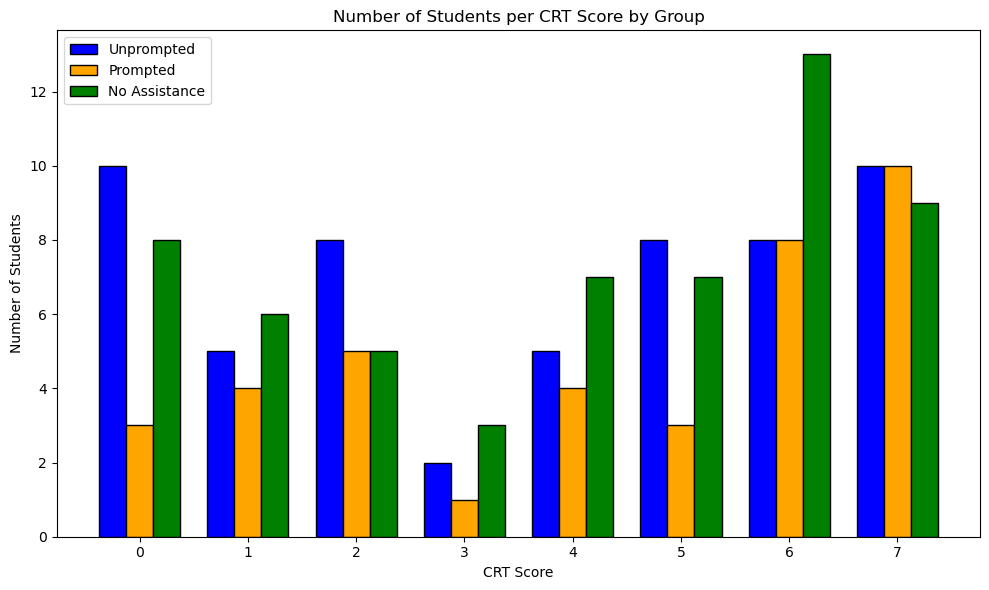

In [4]:
import os

unprompted_counts = unprompted_score_df['CRT'].value_counts().sort_index()
prompted_counts = prompted_score_df['CRT'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['CRT'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['CRT'].max(), prompted_score_df['CRT'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['CRT']) | set(prompted_score_df['CRT']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('CRT Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per CRT Score by Group')

# Add legend
plt.legend()

# Save the plot
output_folder = 'output_folder'
os.makedirs(output_folder, exist_ok=True)
plot_filename = 'crt_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Basic Math Score

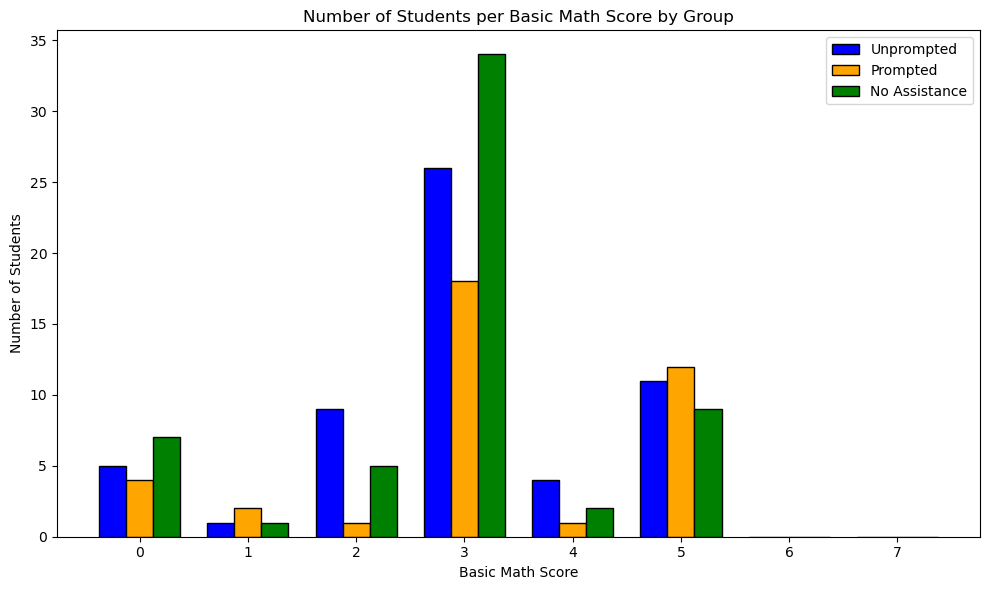

In [5]:
unprompted_counts = unprompted_score_df['Basic Math'].value_counts().sort_index()
prompted_counts = prompted_score_df['Basic Math'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['Basic Math'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['Basic Math'].max(), prompted_score_df['CRT'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['Basic Math']) | set(prompted_score_df['CRT']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('Basic Math Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per Basic Math Score by Group')

# Add legend
plt.legend()

plot_filename = 'basic_math_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Total Score

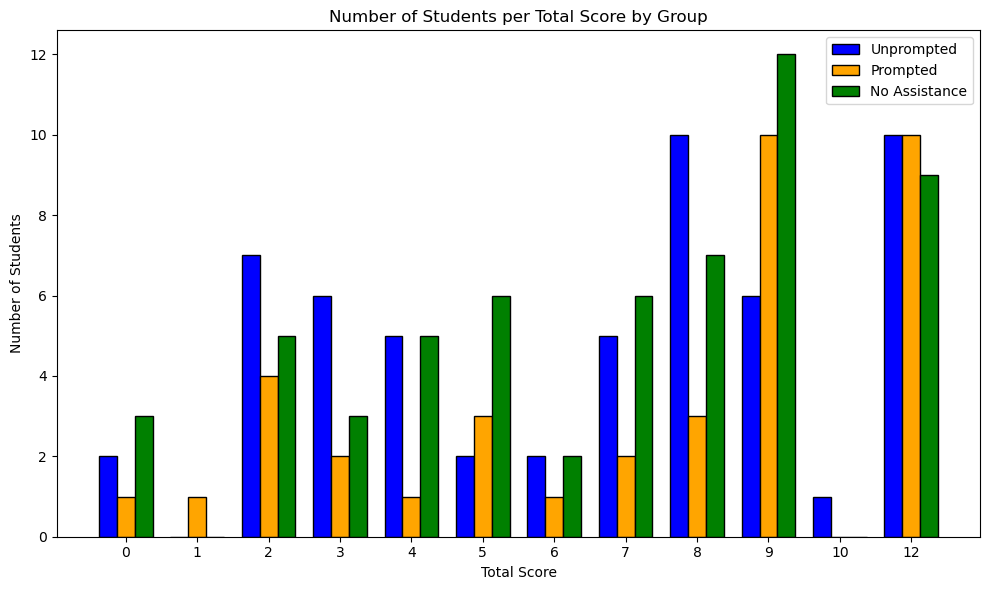

In [6]:
unprompted_counts = unprompted_score_df['Score'].value_counts().sort_index()
prompted_counts = prompted_score_df['Score'].value_counts().sort_index()
no_assistance_counts = no_assistance_score_df['Score'].value_counts().sort_index()

# Get the maximum CRT score for setting x-axis limits
max_crt_score = max(unprompted_score_df['Score'].max(), prompted_score_df['Score'].max(), no_assistance_score_df['CRT'].max())

# Get a sorted array of all unique CRT scores present in the data from all groups
unique_scores = sorted(set(unprompted_score_df['Score']) | set(prompted_score_df['Score']) | set(no_assistance_score_df['CRT']))

# Map the counts to the unique_scores, filling missing values with 0
unprompted_mapped_counts = unprompted_counts.reindex(unique_scores, fill_value=0)
prompted_mapped_counts = prompted_counts.reindex(unique_scores, fill_value=0)
no_assistance_mapped_counts = no_assistance_counts.reindex(unique_scores, fill_value=0)

# Define the positions of the bars
positions = np.arange(len(unique_scores))

# Create a new figure for plotting
plt.figure(figsize=(10, 6))
bar_width = 0.25

# Plot vertical bars for each group
plt.bar(positions - bar_width, unprompted_mapped_counts, width=bar_width, color='blue', label='Unprompted', edgecolor='black')
plt.bar(positions, prompted_mapped_counts, width=bar_width, color='orange', label='Prompted', edgecolor='black')
plt.bar(positions + bar_width, no_assistance_mapped_counts, width=bar_width, color='green', label='No Assistance', edgecolor='black')

# Set the x-axis ticks to the positions of the scores and label them with the actual scores
plt.xticks(positions, unique_scores)

# Add labels and title
plt.xlabel('Total Score')
plt.ylabel('Number of Students')
plt.title('Number of Students per Total Score by Group')

# Add legend
plt.legend()

plot_filename = 'total_score_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## ANOVA

## CRT Score

In [7]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['CRT']
prompted_crt_scores = prompted_score_df['CRT']
no_assistance_crt_scores = no_assistance_score_df['CRT']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 0.9061
P-value: 0.4063


## Basic Math

In [8]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['Basic Math']
prompted_crt_scores = prompted_score_df['Basic Math']
no_assistance_crt_scores = no_assistance_score_df['Basic Math']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 0.6760
P-value: 0.5102


## Total Score

In [9]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = unprompted_score_df['Score']
prompted_crt_scores = prompted_score_df['Score']
no_assistance_crt_scores = no_assistance_score_df['Score']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 0.8180
P-value: 0.4433


## High Scorers ANOVA

In [10]:
def filter_high_scorers(df):
    average_score = df['Score'].mean()
    high_scorers = df[df['Score'] > average_score]
    return high_scorers

# Filter high scorers for each group
high_scorers_prompted = filter_high_scorers(prompted_score_df)
high_scorers_unprompted = filter_high_scorers(unprompted_score_df)
high_scorers_no_assistance = filter_high_scorers(no_assistance_score_df)

print("High Scorers (Prompted):")
print(high_scorers_prompted)

print("\nHigh Scorers (Unprompted):")
print(high_scorers_unprompted)

print("\nHigh Scorers (No Assistance):")
print(high_scorers_no_assistance)

High Scorers (Prompted):
                                     Roll Number  CRT  Basic Math  Score
0                              AA.SC.P2MCA210790    5           3      8
3   AA.SC.U3BCA2401059@ahead.students.amrita.edu    7           5     12
4                             AA.SC.U3BCA2401080    5           4      9
5                               AM.AI.U4AID23049    3           5      8
6                               AM.BU.P2MBA23003    6           3      9
7                               AM.BU.P2MBA23005    4           5      9
9                               AM.BU.P2MBA23027    7           5     12
11                              AM.BU.P2MBA23055    7           5     12
12                              AM.EN.P2AML22001    6           3      9
15                              AM.EN.U4CSE19326    6           3      9
16                              AM.EN.U4CSE20309    5           3      8
17                              AM.EN.U4ECE20008    7           5     12
18                        

In [11]:
from scipy.stats import f_oneway

# Extracting the CRT scores for each group
unprompted_crt_scores = high_scorers_unprompted['Score']
prompted_crt_scores = high_scorers_prompted['Score']
no_assistance_crt_scores = high_scorers_no_assistance['Score']

# Performing a one-way ANOVA
f_statistic, p_value = f_oneway(unprompted_crt_scores, prompted_crt_scores, no_assistance_crt_scores)

f_statistic, p_value
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 2.0237
P-value: 0.1384


## Comparison between CGPA and Current Score of Users

In [88]:
combined_user_ids = list(prompted_sum_of_results_by_user.keys()) + list(unprompted_sum_of_results_by_user.keys()) + list(no_assistance_sum_of_results_by_user.keys())


# Filter the user DataFrame
filtered_user_df = user_data_df[user_data_df['roll_no'].isin(combined_user_ids)]

# Display the filtered user DataFrame
print(filtered_user_df)

len(filtered_user_df)

      id             roll_no                            name  \
521  556    AM.SC.U4CYS23002                 Aayushman Singh   
522  557    AM.SC.U4CYS23021                     Devnath N S   
523  558    AM.SC.U4CYS23009                         Anirudh   
525  560    AM.SC.U4CYS23026  KUPPA SRI NAGA VENKATA ABHIRAM   
526  561    AM.SC.U4CYS23025                    Keerthan K K   
..   ...                 ...                             ...   
790  827  AA.SC.P2MCA2307403               Yash Sumit Ranjit   
791  828    I don't know yet                           Adnan   
792  829  AA.SC.P2MCA2401719                        Rashmika   
793  830    AM.EN.U4ECE20008                Aman Kumar Singh   
794  831               12345                            Arun   

                                            email  gender  age     degree  \
521       am.sc.u4cys23002@am.students.amrita.edu    male   16     B-Tech   
522       am.sc.u4cys23021@am.students.amrita.edu    male   20     B-Tech   


152

In [89]:
filtered_user_df.head(n=41)


,id,roll_no,name,email,gender,age,degree,uni,cgpa,device_dimensions
521,556,AM.SC.U4CYS23002,Aayushman Singh,am.sc.u4cys23002@am.students.amrita.edu,male,16,B-Tech,"Amrita Vishwa Vidhyapeetha,",9.65,"1920,932"
522,557,AM.SC.U4CYS23021,Devnath N S,am.sc.u4cys23021@am.students.amrita.edu,male,20,B-Tech,Amrita Vishwa Vidyapeetham,9.37,"1528,742"
523,558,AM.SC.U4CYS23009,Anirudh,am.sc.u4cys23009@am.students.amrita.edu,male,18,BTECH,Amrita University,9.92,"1528,708"
525,560,AM.SC.U4CYS23026,KUPPA SRI NAGA VENKATA ABHIRAM,am.sc.u4cys23026@am.students.amrita.edu,male,17,B-Tech,AMRITA VISHWA VIDYAPEETHAM,7.62,"393,720"
526,561,AM.SC.U4CYS23025,Keerthan K K,am.sc.u4cys23025@am.students.amrita.edu,male,18,Btech CYS,Amrita University,9.85,"1488,790"
527,562,am.sc.u4cys23035,P Akshara Kruti,am.sc.u4cys23035@am.students.amrita.edu,female,14,BTech in Cyber Security S2,"Amrita Vishwa Vidyapeetham, Amritapuri",7.58,"1536,695"
528,563,AM.SC.U4CYS23041,Pranav Turala,am.sc.u4cys23041@am.students.amrita.edu,male,19,B Tech Comp Sci,Amrita Vishwa Vidyapeetam,9.17,"1920,963"
529,564,AM.SC.U4CYS23039,Sara Liz Thomas,am.sc.u4cys23039@am.students.amrita.edu,female,19,BTECH CYS,Amrita Vishwavidyapeetham,7.60,"1280,678"
530,565,AM.SC.U4CYS23023,Akshaya Kanagala,am.sc.u4cys23023@am.students.amrita.edu,female,19,B.tech Cyber Security,Amrita Vishwa Vidyapeetham Amritapuri,7.90,"1488,708"
531,566,am.sc.u4cys23004,adarsh sasikumar,am.sc.u4cys23004@am.students.amrita.edu,male,18,Btech CYS,Amrita School of Comuting,9.80,"1536,695"


In [90]:
filtered_user_df.head(n=41)
main_columns= ['roll_no', 'cgpa']
user_data_df_table_1_copy = filtered_user_df[main_columns]
user_data_df_table_1_copy

,roll_no,cgpa
521,AM.SC.U4CYS23002,9.65
522,AM.SC.U4CYS23021,9.37
523,AM.SC.U4CYS23009,9.92
525,AM.SC.U4CYS23026,7.62
526,AM.SC.U4CYS23025,9.85
...,...,...
790,AA.SC.P2MCA2307403,9.00
791,I don't know yet,8.50
792,AA.SC.P2MCA2401719,6.90
793,AM.EN.U4ECE20008,9.45


In [91]:
user_data_df_table_1 = user_data_df_table_1_copy.copy()
user_data_df_table_1.rename(columns={'roll_no': 'Roll Number'}, inplace=True)

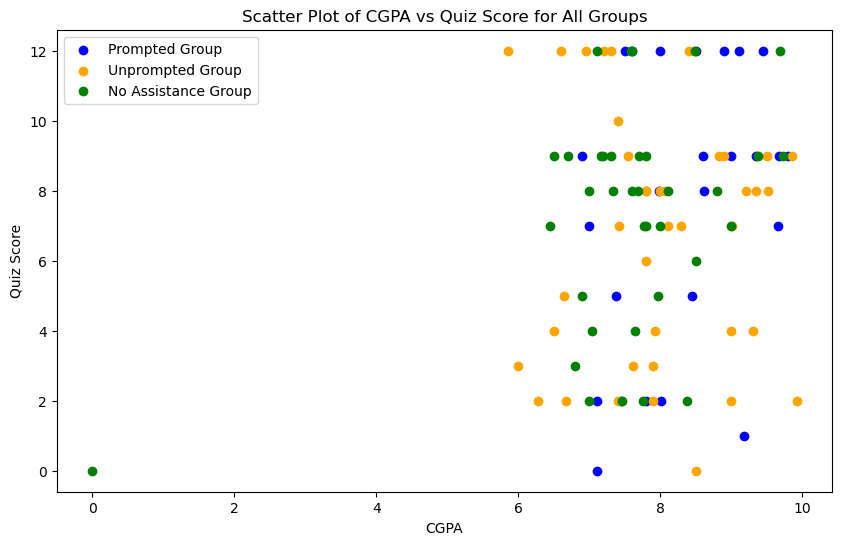

In [92]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['Score'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['Score'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['Score'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('Quiz Score')
plt.title('Scatter Plot of CGPA vs Quiz Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'total_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

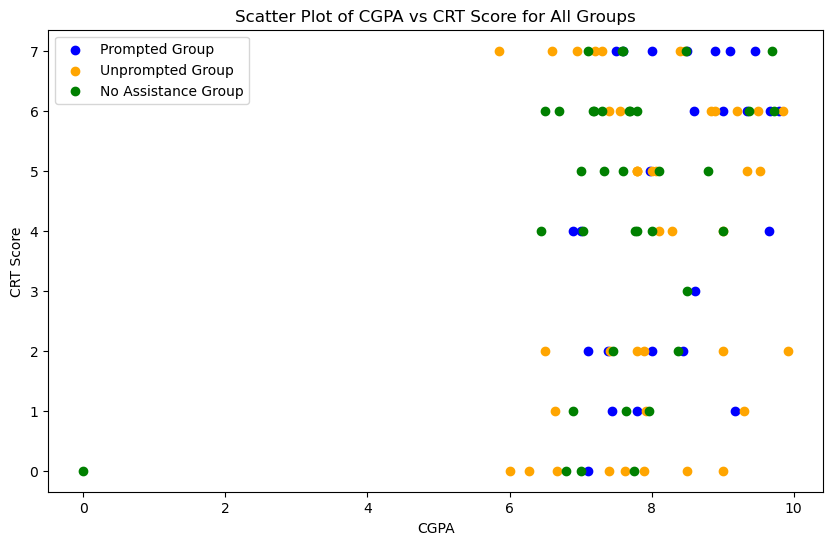

In [93]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['CRT'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['CRT'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['CRT'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('CRT Score')
plt.title('Scatter Plot of CGPA vs CRT Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'crt_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

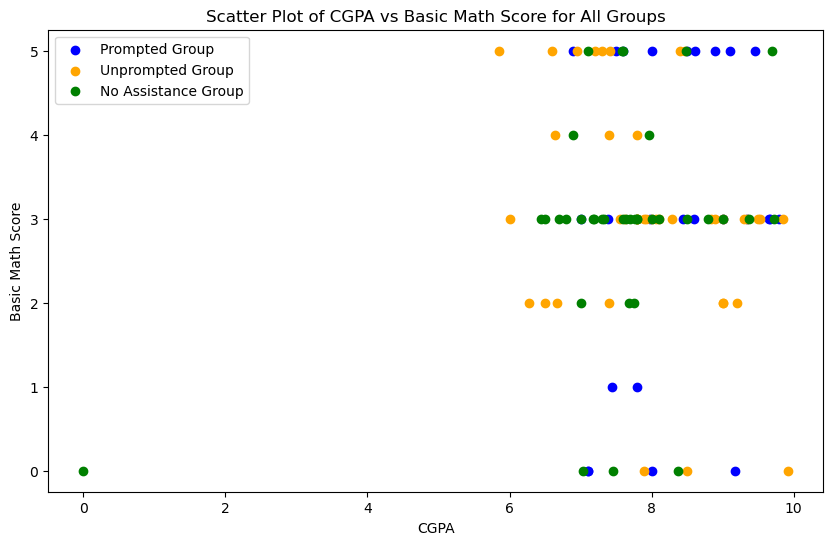

In [94]:
import matplotlib.pyplot as plt

# Create a single scatter plot with different colors for each group
plt.figure(figsize=(10, 6))

plt.scatter(prompted_df['cgpa'], prompted_df['Basic Math'], color='blue', label='Prompted Group')
plt.scatter(unprompted_df['cgpa'], unprompted_df['Basic Math'], color='orange', label='Unprompted Group')
plt.scatter(no_assistance_df['cgpa'], no_assistance_df['Basic Math'], color='green', label='No Assistance Group')

# Labeling the axes and the plot
plt.xlabel('CGPA')
plt.ylabel('Basic Math Score')
plt.title('Scatter Plot of CGPA vs Basic Math Score for All Groups')

# Add a legend to explain which color corresponds to which group
plt.legend()

plot_filename = 'bm_vs_cgpa_scatter_plot.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Show the plot
plt.show()

In [95]:
user_data_df_table_1_copy = user_data_df_table_1.copy()
user_data_df_table_1_copy.rename(columns={'roll_no': 'Roll Number'}, inplace=True)

user_data_df_table_1_copy

,Roll Number,cgpa
521,AM.SC.U4CYS23002,9.65
522,AM.SC.U4CYS23021,9.37
523,AM.SC.U4CYS23009,9.92
525,AM.SC.U4CYS23026,7.62
526,AM.SC.U4CYS23025,9.85
...,...,...
790,AA.SC.P2MCA2307403,9.00
791,I don't know yet,8.50
792,AA.SC.P2MCA2401719,6.90
793,AM.EN.U4ECE20008,9.45


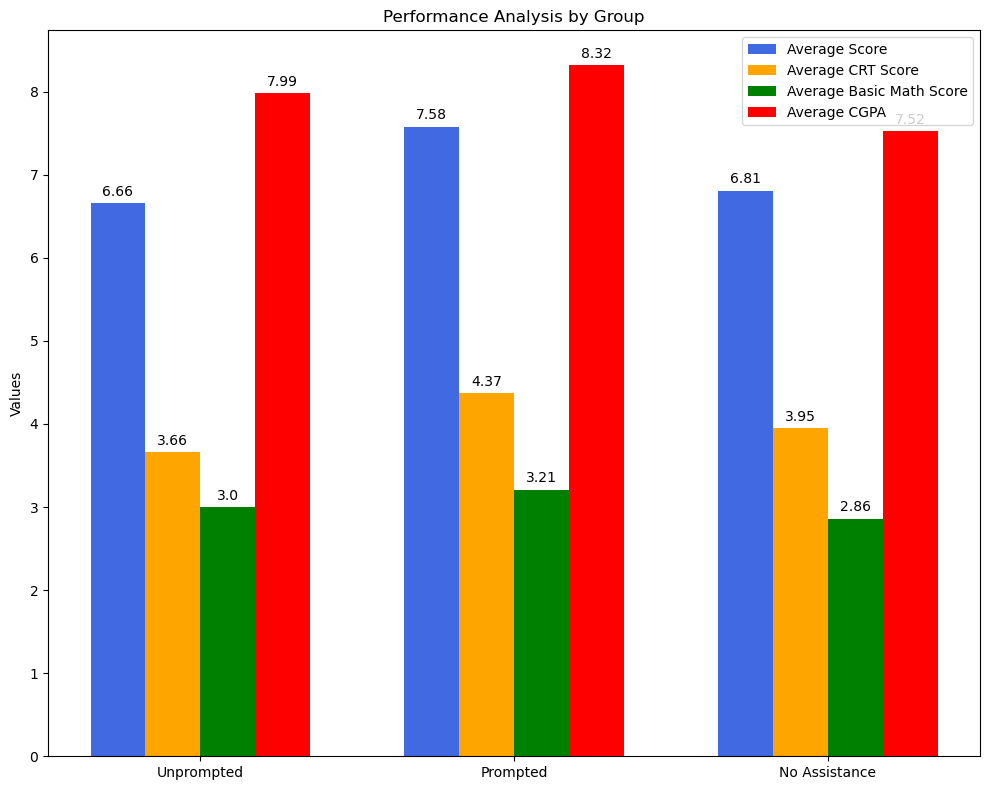

In [96]:
prompted_df = prompted_score_df.merge(user_data_df_table_1, on='Roll Number')
unprompted_df = unprompted_score_df.merge(user_data_df_table_1, on='Roll Number')
no_assistance_df = no_assistance_score_df.merge(user_data_df_table_1, on='Roll Number')

group_data = {
    'Groups': ['Unprompted', 'Prompted', 'No Assistance'],
    'Average Score': [
        unprompted_df['Score'].mean(),
        prompted_df['Score'].mean(),
        no_assistance_df['Score'].mean()
    ],
    'Average CGPA': [
        unprompted_df['cgpa'].mean(),
        prompted_df['cgpa'].mean(),
        no_assistance_df['cgpa'].mean()
    ],
    'Average CRT Score': [
        unprompted_df['CRT'].mean(),
        prompted_df['CRT'].mean(),
        no_assistance_df['CRT'].mean()
    ],
    'Average Baisc Math score': [
        unprompted_df['Basic Math'].mean(),
        prompted_df['Basic Math'].mean(),
        no_assistance_df['Basic Math'].mean()
    ]
    
}

group_df = pd.DataFrame(group_data)

# Setting up the x-axis for the bar graph
x = np.arange(len(group_df))

# Defining the width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

# Calculating the positions of the group bar clusters
bar_positions = np.arange(len(group_df['Groups']))

# Setting up individual bar positions within each cluster
bar_positions1 = bar_positions - width/2 - width/4
bar_positions2 = bar_positions - width/4
bar_positions3 = bar_positions + width/4
bar_positions4 = bar_positions + width/2 + width/4

# Plotting each set of bars
rects1 = ax.bar(bar_positions1, group_df['Average Score'], width/2, label='Average Score', color='royalblue')
rects2 = ax.bar(bar_positions2, group_df['Average CRT Score'], width/2, label='Average CRT Score', color='orange')
rects3 = ax.bar(bar_positions3, group_df['Average Baisc Math score'], width/2, label='Average Basic Math Score', color='green')
rects4 = ax.bar(bar_positions4, group_df['Average CGPA'], width/2, label='Average CGPA', color='red')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Performance Analysis by Group')
ax.set_xticks(bar_positions)
ax.set_xticklabels(group_df['Groups'])
ax.legend()

# Autolabel function to attach a text label above each bar, displaying its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Calling the autolabel function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plot_filename = 'performance_analysis_by_group.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Displaying the bar graph
plt.tight_layout()
plt.show()


## FEEDBACK

In [ ]:
df_feedback_ques

In [98]:
df_feedback_ans.head
df_filtered_feedback_ans = df_feedback_ans[df_feedback_ans['user'].isin(combined_user_ids)]

df_filtered_feedback_ans

,id,user,action,set,time,date,page
6676,6677,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12T13:38:07.480745+05:30,Question 1
6677,6678,AM.SC.U4CYS23009,B,2,13:38:00,2024-04-12T13:38:07.544025+05:30,Question 2
6678,6679,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12T13:38:07.605295+05:30,Question 3
6679,6680,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12T13:38:07.667899+05:30,Question 4
6680,6681,AM.SC.U4CYS23009,C,2,13:38:00,2024-04-12T13:38:07.738640+05:30,Question 5
...,...,...,...,...,...,...,...
12148,12149,12345,C,2,22:38:58,2024-05-08T22:39:01.591436+05:30,Question 14
12149,12150,12345,D,2,22:38:58,2024-05-08T22:39:01.736515+05:30,Question 15
12150,12151,12345,C,2,22:38:58,2024-05-08T22:39:01.886448+05:30,Question 16
12151,12152,12345,C,2,22:38:58,2024-05-08T22:39:02.021527+05:30,Question 17


In [99]:
df_filtered_feedback_ans['date'] = pd.to_datetime(df_filtered_feedback_ans['date'])

start_date = pd.Timestamp('2024-04-12').date()
end_date = pd.Timestamp.today().date()
df_filtered_feedback_ans = df_filtered_feedback_ans[(df_filtered_feedback_ans['date'].dt.date >= start_date) & 
                                         (df_filtered_feedback_ans['date'].dt.date <= end_date)]
df_filtered_feedback_ans

C:\Users\hp\AppData\Local\Temp\ipykernel_47408\1542027737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_feedback_ans['date'] = pd.to_datetime(df_filtered_feedback_ans['date'])


,id,user,action,set,time,date,page
6676,6677,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12 13:38:07.480745+05:30,Question 1
6677,6678,AM.SC.U4CYS23009,B,2,13:38:00,2024-04-12 13:38:07.544025+05:30,Question 2
6678,6679,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12 13:38:07.605295+05:30,Question 3
6679,6680,AM.SC.U4CYS23009,A,2,13:38:00,2024-04-12 13:38:07.667899+05:30,Question 4
6680,6681,AM.SC.U4CYS23009,C,2,13:38:00,2024-04-12 13:38:07.738640+05:30,Question 5
...,...,...,...,...,...,...,...
12148,12149,12345,C,2,22:38:58,2024-05-08 22:39:01.591436+05:30,Question 14
12149,12150,12345,D,2,22:38:58,2024-05-08 22:39:01.736515+05:30,Question 15
12150,12151,12345,C,2,22:38:58,2024-05-08 22:39:01.886448+05:30,Question 16
12151,12152,12345,C,2,22:38:58,2024-05-08 22:39:02.021527+05:30,Question 17


In [100]:
first_4_questions = df_feedback_ques.head(4)
first_4_questions

,id,questions,option1,option2,option3,option4,option5
0,27,Win a gift card worth $300 or receive a $50 gi...,Choose the $300 gift card,Choose the monthly $50 gift cards for the next...,NaN,NaN,NaN
1,28,Choose a $400 end-of-year bonus now or a $100 ...,Choose $400 end-of-year bonus now,Choose a $100 increase in your monthly salary ...,NaN,NaN,NaN
2,29,"Pay a fine of Rs.2000 now, or take a 10% chanc...",Choose to pay Rs.2000 fine now,Choose to take 10% chance to pay Rs.3000 fine,NaN,NaN,NaN
3,30,"Pay a fine of Rs20 now, or take a 10% chance t...",Choose to pay Rs.20 fine now,Choose to take 10% chance to pay Rs.2000 fine,NaN,NaN,NaN


In [101]:
# merged_df = pd.merge(df_feedback_ques, df_feedback_ans, how='left')

# Create a dictionary to store user actions
user_actions = {}

# Iterate over the merged dataframe
for _, row in df_filtered_feedback_ans.iterrows():
    user_id = row['user']
    action = row['action']
    question = row['page']

    # Check if the user is already in the dictionary
    if user_id in user_actions:
        # If the user exists, append the action to the list
        user_actions[user_id].append((question, action))
    else:
        # If the user doesn't exist, create a new entry with a list containing the action
        user_actions[user_id] = [(question, action)]


In [102]:
cleaned_data = {}
for user, responses in user_actions.items():
    latest_responses = {}
    # Reverse the list so we process the latest occurrence first
    for question, response in reversed(responses):
        if question not in latest_responses:
            latest_responses[question] = response
    cleaned_data[user] = latest_responses



In [104]:
first_4_questions_user_response_data = {}

for user, responses in cleaned_data.items():
    filtered_responses = {q: r for q, r in responses.items() if q in ["Question 1", "Question 2", "Question 3", "Question 4"]}
    first_4_questions_user_response_data[user] = filtered_responses

first_4_questions_user_response_data

{'AM.SC.U4CYS23009': {'Question 4': 'A',
  'Question 3': 'A',
  'Question 2': 'B',
  'Question 1': 'A'},
 'AM.SC.U4CYS23002': {'Question 4': 'A',
  'Question 3': 'B',
  'Question 2': 'B',
  'Question 1': 'B'},
 'AM.SC.U4CYS23021': {'Question 4': 'A',
  'Question 3': 'A',
  'Question 2': 'B',
  'Question 1': 'B'},
 'AM.SC.U4CYS23041': {'Question 4': 'A',
  'Question 3': 'B',
  'Question 2': 'B',
  'Question 1': 'B'},
 'AM.SC.U4CYS23026': {'Question 4': 'A',
  'Question 3': 'B',
  'Question 2': 'B',
  'Question 1': 'B'},
 'AM.SC.U4CYS23033': {'Question 4': 'A',
  'Question 3': 'B',
  'Question 2': 'B',
  'Question 1': 'B'},
 'am.sc.u4cys23004': {'Question 4': 'A',
  'Question 3': 'A',
  'Question 2': 'B',
  'Question 1': 'B'},
 'am.sc.u4cys23034': {'Question 4': 'A',
  'Question 3': 'A',
  'Question 2': 'A',
  'Question 1': 'A'},
 'AM.SC.U4CYS23010': {'Question 4': 'A',
  'Question 3': 'B',
  'Question 2': 'B',
  'Question 1': 'B'},
 'AM.SC.U4CYS23025': {'Question 4': 'A',
  'Question 3'

In [105]:
questions_user_response_data_5_to_8 = {}

for user, responses in cleaned_data.items():
    filtered_responses = {q: r for q, r in responses.items() if q in ["Question 5", "Question 6", "Question 7", "Question 8"]}
    questions_user_response_data_5_to_8[user] = filtered_responses


In [106]:
questions_1_to_4 = {}
questions_5_to_8 = {}
remaining_9_to_18 = {}

for user, actions in user_actions.items():
    questions_1_to_4[user] = actions[:4]
    questions_5_to_8[user] = actions[4:8]
    remaining_9_to_18[user] = actions[8:]


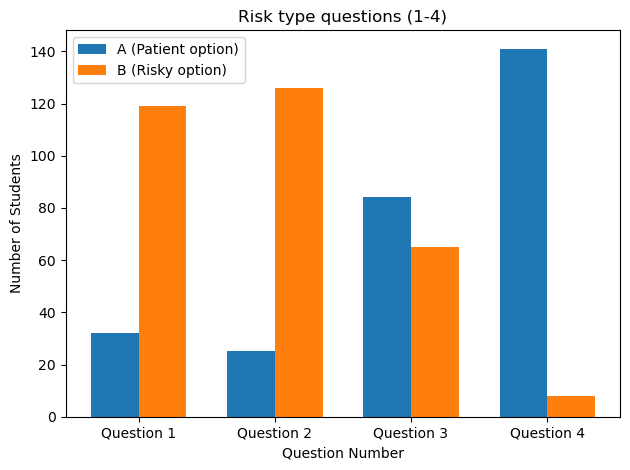

In [107]:
option1_counts = {f'Question {i}': 0 for i in range(1, 5)}
option2_counts = {f'Question {i}': 0 for i in range(1, 5)}

# Count the number of students who chose option1 or option2 for each question
for actions in questions_1_to_4.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots()
question_numbers = list(range(1, 5))
bar_width = 0.35

option1_bars = ax.bar(question_numbers, option1_counts.values(), bar_width, label='A (Patient option)')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts.values(), bar_width, label='B (Risky option)')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('Risk type questions (1-4)')
ax.set_xticks([x + bar_width / 2 for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()

plot_filename = 'questions_1_to_4.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

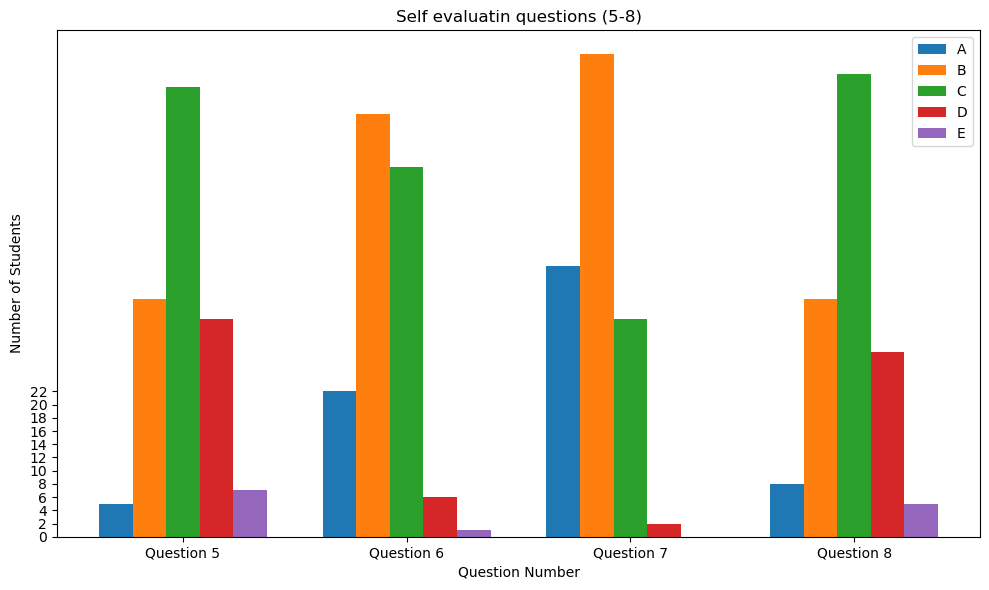

In [108]:
option1_counts = {f'Question {i}': 0 for i in range(1, 19)}
option2_counts = {f'Question {i}': 0 for i in range(1, 19)}
option3_counts = {f'Question {i}': 0 for i in range(1, 19)}
option4_counts = {f'Question {i}': 0 for i in range(1, 19)}
option5_counts = {f'Question {i}': 0 for i in range(1, 19)}

# Count the number of students who chose each option for each question
for actions in questions_5_to_8.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1
        elif option == 'C':
            option3_counts[question] += 1
        elif option == 'D':
            option4_counts[question] += 1
        elif option == 'E':
            option5_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
question_numbers = list(range(5, 9))
bar_width = 0.15

option1_counts_values = [option1_counts[f'Question {i}'] for i in question_numbers]
option2_counts_values = [option2_counts[f'Question {i}'] for i in question_numbers]
option3_counts_values = [option3_counts[f'Question {i}'] for i in question_numbers]
option4_counts_values = [option4_counts[f'Question {i}'] for i in question_numbers]
option5_counts_values = [option5_counts[f'Question {i}'] for i in question_numbers]

option1_bars = ax.bar(question_numbers, option1_counts_values, bar_width, label='A')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts_values, bar_width, label='B')
option3_bars = ax.bar([x + 2 * bar_width for x in question_numbers], option3_counts_values, bar_width, label='C')
option4_bars = ax.bar([x + 3 * bar_width for x in question_numbers], option4_counts_values, bar_width, label='D')
option5_bars = ax.bar([x + 4 * bar_width for x in question_numbers], option5_counts_values, bar_width, label='E')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('Self evaluatin questions (5-8)')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax.set_xticks([x + 2 * bar_width for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()
plot_filename = 'questions_5_to_8.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

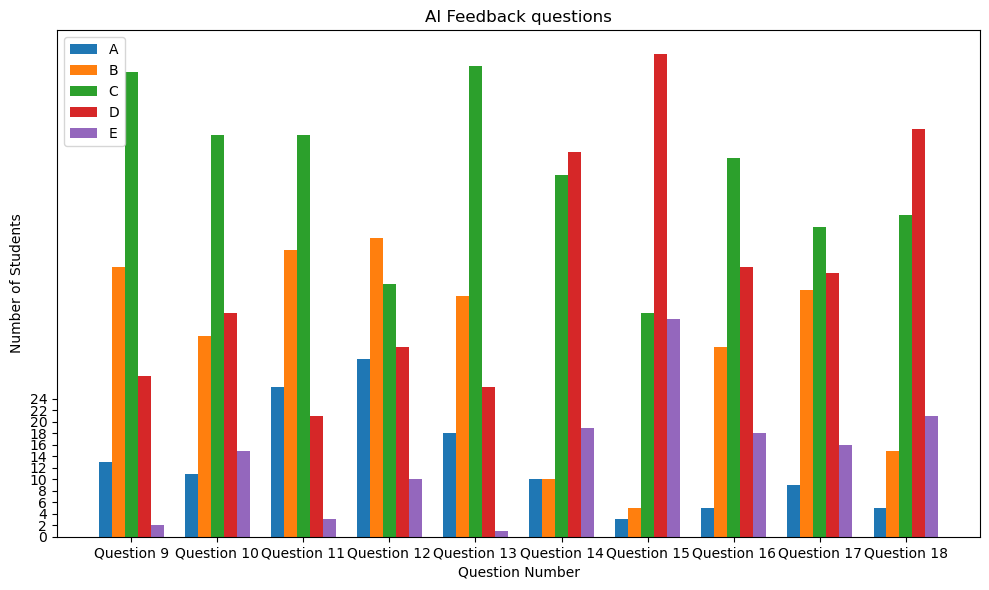

In [109]:
option1_counts = {f'Question {i}': 0 for i in range(1, 19)}
option2_counts = {f'Question {i}': 0 for i in range(1, 19)}
option3_counts = {f'Question {i}': 0 for i in range(1, 19)}
option4_counts = {f'Question {i}': 0 for i in range(1, 19)}
option5_counts = {f'Question {i}': 0 for i in range(1, 19)}

# Count the number of students who chose each option for each question
for actions in remaining_9_to_18.values():
    for question, option in actions:
        if option == 'A':
            option1_counts[question] += 1
        elif option == 'B':
            option2_counts[question] += 1
        elif option == 'C':
            option3_counts[question] += 1
        elif option == 'D':
            option4_counts[question] += 1
        elif option == 'E':
            option5_counts[question] += 1

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
question_numbers = list(range(9, 19))
bar_width = 0.15

option1_counts_values = [option1_counts[f'Question {i}'] for i in question_numbers]
option2_counts_values = [option2_counts[f'Question {i}'] for i in question_numbers]
option3_counts_values = [option3_counts[f'Question {i}'] for i in question_numbers]
option4_counts_values = [option4_counts[f'Question {i}'] for i in question_numbers]
option5_counts_values = [option5_counts[f'Question {i}'] for i in question_numbers]

option1_bars = ax.bar(question_numbers, option1_counts_values, bar_width, label='A')
option2_bars = ax.bar([x + bar_width for x in question_numbers], option2_counts_values, bar_width, label='B')
option3_bars = ax.bar([x + 2 * bar_width for x in question_numbers], option3_counts_values, bar_width, label='C')
option4_bars = ax.bar([x + 3 * bar_width for x in question_numbers], option4_counts_values, bar_width, label='D')
option5_bars = ax.bar([x + 4 * bar_width for x in question_numbers], option5_counts_values, bar_width, label='E')

# Add labels and title
ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Students')
ax.set_title('AI Feedback questions')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
ax.set_xticks([x + 2 * bar_width for x in question_numbers])
ax.set_xticklabels([f'Question {num}' for num in question_numbers])

# Add legend
ax.legend()

plot_filename = 'questions_9_to_18.png'
plot_path = os.path.join(output_folder, plot_filename)
plt.savefig(plot_path)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Analysis withing groups

## CRT - T-test

In [112]:
prompted_scores_df = pd.read_csv("prompted_scores.csv")
unprompted_scores_df = pd.read_csv("unprompted_scores.csv")
no_assistance_scores_df = pd.read_csv("no_assistance_scores.csv")

## Analysis - Prompted group

In [113]:
crt_prompted_scores_df = prompted_scores_df[['Roll Number', 'CRT']]
crt_prompted_scores = crt_prompted_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [114]:
# Convert 'CRT' column to numeric
# Now proceed with your original code
prompted_sorted_scores = dict(sorted(crt_prompted_scores.items(), key=lambda item: item[1], reverse=True))
# prompted_average_score = crt_prompted_scores.mean()
# prompted_high_scorers = {k: v for k, v in prompted_sorted_scores.items() if v > prompted_average_score}
# prompted_low_scorers = {k: v for k, v in prompted_sorted_scores.items() if v <= prompted_average_score}


In [115]:
prompt_crt_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in prompted_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
prompted_count_crt = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in prompt_crt_scorers_feedback.values():
    for question, option in responses.items():
        if question in prompted_count_crt:
            prompted_count_crt[question][option] += 1

# # Calculate the percentages
# total_crt_students = len(prompt_crt_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
#         for question, options in prompted_count_crt.items()}

prompted_count_crt

{'Question 1': {'A': 8, 'B': 30},
 'Question 2': {'A': 7, 'B': 31},
 'Question 3': {'A': 18, 'B': 20},
 'Question 4': {'A': 34, 'B': 4}}

## Analysis - Unprompted

In [116]:
crt_unprompted_scores_df = unprompted_scores_df[['Roll Number', 'CRT']]
crt_unprompted_scores = crt_unprompted_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [117]:
unprompted_sorted_scores = dict(sorted(crt_unprompted_scores.items(), key=lambda item: item[1], reverse=True))
# unprompted_average_score = sum(crt_unprompted_scores.values()) / len(unprompted_sorted_scores)
# unprompted_high_scorers = {k: v for k, v in unprompted_sorted_scores.items() if v > unprompted_average_score}
# unprompted_low_scorers = {k: v for k, v in unprompted_sorted_scores.items() if v <= unprompted_average_score}

In [118]:
unprompted_crt_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in unprompted_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
unprompted_crt_count = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in unprompted_crt_scorers_feedback.values():
    for question, option in responses.items():
        if question in unprompted_crt_count:
            unprompted_crt_count[question][option] += 1

# # Calculate the percentages
# total_high_crt_students = len(unprompted_crt_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
#         for question, options in unprompted_question_counters_high.items()}

unprompted_crt_count

{'Question 1': {'A': 10, 'B': 44},
 'Question 2': {'A': 8, 'B': 46},
 'Question 3': {'A': 31, 'B': 23},
 'Question 4': {'A': 52, 'B': 2}}

## Analysis - No Assistance

In [119]:
crt_no_assistance_scores_df = no_assistance_scores_df[['Roll Number', 'CRT']]
crt_no_assistance_scores = crt_no_assistance_scores_df.set_index('Roll Number')['CRT'].to_dict()


In [120]:
no_assistance_sorted_scores = dict(sorted(crt_no_assistance_scores.items(), key=lambda item: item[1], reverse=True))
# no_assistance_average_score = sum(crt_no_assistance_scores.values()) / len(no_assistance_sorted_scores)
# no_assistance_high_scorers = {k: v for k, v in no_assistance_sorted_scores.items() if v > no_assistance_average_score}
# no_assistance_low_scorers = {k: v for k, v in no_assistance_sorted_scores.items() if v <= no_assistance_average_score}

In [121]:
no_assistance_scorers_feedback = {user: first_4_questions_user_response_data[user] for user in no_assistance_sorted_scores if user in first_4_questions_user_response_data}

# Initialize counters for the options
no_assistance_count = {
    'Question 1': {'A': 0, 'B': 0},
    'Question 2': {'A': 0, 'B': 0},
    'Question 3': {'A': 0, 'B': 0},
    'Question 4': {'A': 0, 'B': 0},
}

# Count options for each question among high and low CRT students
for responses in no_assistance_scorers_feedback.values():
    for question, option in responses.items():
        if question in no_assistance_count:
            no_assistance_count[question][option] += 1

# # Calculate the percentages
# total_high_crt_students = len(no_assistance_scorers_feedback)
# percentages_high = {
#     question: {option: (count / total_high_crt_students) * 100 for option, count in options.items()}
        # for question, options in question_counters_high.items()}

no_assistance_count

{'Question 1': {'A': 13, 'B': 45},
 'Question 2': {'A': 10, 'B': 48},
 'Question 3': {'A': 35, 'B': 23},
 'Question 4': {'A': 56, 'B': 2}}

## ANOVA for the feedback responses

In [122]:
import numpy as np
from scipy.stats import f_oneway
# Calculate the proportion of responses choosing option A for each question within each group
def calculate_proportions_A(count_dict):
    proportions = []
    for q in count_dict.values():
        total_responses = q['A'] + q['B']
        proportion_A = q['A'] / total_responses if total_responses != 0 else 0
        proportions.append(proportion_A)
    return proportions

prop_prompted_A = calculate_proportions_A(prompted_count_crt)
prop_unprompted_A = calculate_proportions_A(unprompted_crt_count)
prop_no_assistance_A = calculate_proportions_A(no_assistance_count)

# One-way ANOVA across the groups for the option B for the 4 intertemporal questions
f_val, p_val = f_oneway(prop_prompted_A, prop_unprompted_A, prop_no_assistance_A)
f_val, p_val


(0.019625683606270927, 0.9806074903589459)

In [123]:
from scipy.stats import f_oneway

def calculate_proportions_B(count_dict):
    proportions = []
    for q in count_dict.values():
        total_responses = q['A'] + q['B']
        proportion_B = q['B'] / total_responses if total_responses != 0 else 0
        proportions.append(proportion_B)
    return proportions

prop_prompted = calculate_proportions_B(prompted_count_crt)
prop_unprompted = calculate_proportions_B(unprompted_crt_count)
prop_no_assistance = calculate_proportions_B(no_assistance_count)

# One-way ANOVA across the groups for the option B for the 4 intertemporal questions
f_val, p_val = f_oneway(prop_prompted, prop_unprompted, prop_no_assistance)
f_val, p_val

(0.01962568360627092, 0.9806074903589459)

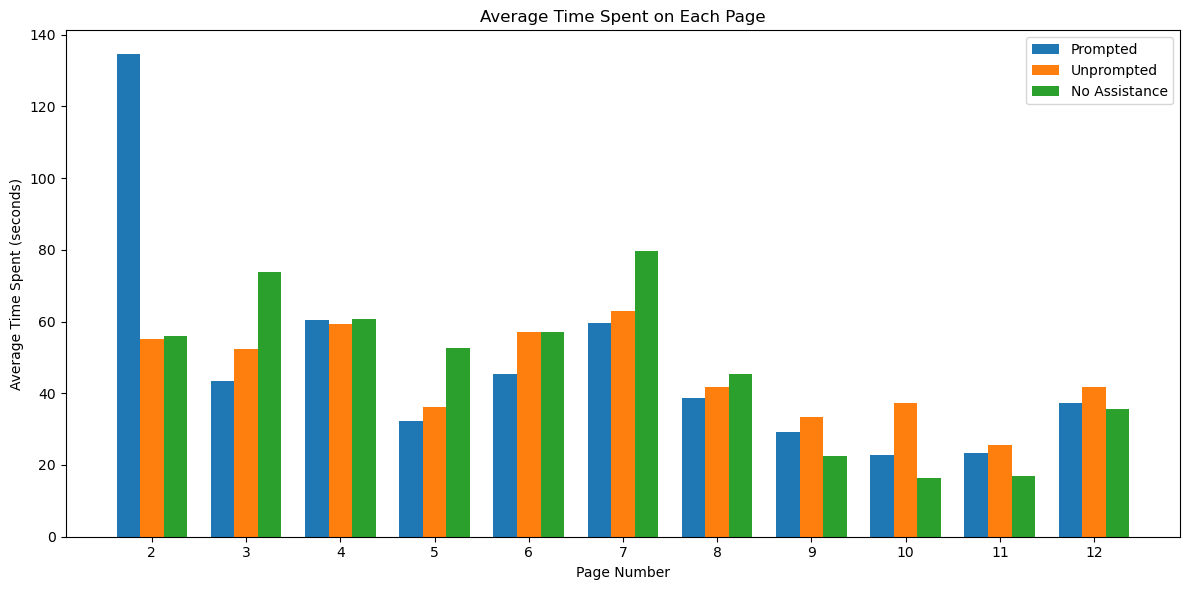

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate average time spent on each page for a given DataFrame
def calculate_avg_time(df):
    df['date_diff_seconds'] = df['date_diff'].dt.total_seconds()
    new_df = df.pivot_table(index='user', columns='page', values='date_diff_seconds', aggfunc='sum', fill_value=0)
    new_df = new_df.reset_index()
    new_df = new_df.rename_axis(None, axis=1).rename_axis('user', axis=0)
    new_df.columns.name = None
    new_df['total_time'] = new_df.iloc[:, 1:].sum(axis=1)

    page_columns = [col for col in new_df.columns[2:] if col != 'total_time']

    avg_times = new_df[page_columns].mean().reset_index()
    avg_times.columns = ['page', 'avg_time']
    return avg_times.set_index('page').to_dict()['avg_time']

# Calculate average times for each group
avg_times_prompted = calculate_avg_time(prompted_filtered_df)
avg_times_unprompted = calculate_avg_time(unprompted_filtered_df)
avg_times_no_assistance = calculate_avg_time(no_assistance_filtered_df)

# Plotting the histogram
plt.figure(figsize=(12, 6))

# Plotting for prompted
plt.bar(range(len(avg_times_prompted)), list(avg_times_prompted.values()), width=0.25, label='Prompted', align='center')

# Plotting for unprompted
plt.bar([x + 0.25 for x in range(len(avg_times_unprompted))], list(avg_times_unprompted.values()), width=0.25, label='Unprompted', align='center')

# Plotting for no assistance
plt.bar([x + 0.5 for x in range(len(avg_times_no_assistance))], list(avg_times_no_assistance.values()), width=0.25, label='No Assistance', align='center')

# Adding labels and title
plt.xlabel('Page Number')
plt.ylabel('Average Time Spent (seconds)')
plt.title('Average Time Spent on Each Page')
plt.xticks([x + 0.25 for x in range(len(avg_times_prompted))], list(avg_times_prompted.keys()))
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Finding how often did the user use the prompt - Prompted Data


In [16]:
import pandas as pd
import os
import cleanup as cl

prompted_df = cl.select_latest_data(df_prompted_table)
prompted_df = cl.find_date_time_diff(prompted_df)
prompted_df = cl.remove_incomplete(prompted_df)

In [34]:
user_data_df = prompted_df.loc[prompted_df['user'] == 'DEVYANSH BRAHMOPADESA']
user_data_df

,user,action,page,time,date,date_diff
0,DEVYANSH BRAHMOPADESA,A,1,14:49:37,2024-05-08 00:19:45.097927+05:30,0 days 00:00:08.009769
1,DEVYANSH BRAHMOPADESA,Continue,1,14:49:44,2024-05-08 00:19:47.297186+05:30,0 days 00:00:02.199259
2,DEVYANSH BRAHMOPADESA,D,2,14:49:47,2024-05-08 00:19:49.937423+05:30,0 days 00:00:02.640237
3,DEVYANSH BRAHMOPADESA,Continue,2,14:49:49,2024-05-08 00:19:50.457712+05:30,0 days 00:00:00.520289
4,DEVYANSH BRAHMOPADESA,D,3,14:49:50,2024-05-08 00:19:53.685448+05:30,0 days 00:00:03.227736
...,...,...,...,...,...,...
2182,DEVYANSH BRAHMOPADESA,Continue,1,15:43:34,2024-05-02 15:43:35.811220+05:30,0 days 00:00:02.130532
2183,DEVYANSH BRAHMOPADESA,Prompt,2,15:43:36,2024-05-02 15:43:51.593424+05:30,0 days 00:00:15.782204
2184,DEVYANSH BRAHMOPADESA,C,2,15:43:52,2024-05-02 15:45:30.777630+05:30,0 days 00:01:39.184206
2185,DEVYANSH BRAHMOPADESA,Continue,2,15:45:31,2024-05-02 15:45:32.165945+05:30,0 days 00:00:01.388315


In [29]:
prompt_count_by_user = prompted_df[prompted_df['action'] == 'Prompt'].groupby('user').size().reset_index(name='prompt_count')
print("Prompt Count by User:")
prompt_count_by_user

Prompt Count by User:


,user,prompt_count
0,201ADB077,1
1,7376222CB127,12
2,8008,1
3,AA.SC.P2MCA2307716,7
4,AA.SC.P2MCA2307722,11
5,AA.SC.P2MCA2401703@ahead.students.amrita.edu,7
6,AA.SC.U3BCA2401080,3
7,AA.SC.U3BCA2401106,8
8,AA.SC.U3CSC2107159,1
9,AIE22148,6


In [19]:
# Step 2: Determine for which question/page the "Prompt" was used the most
prompt_count_by_page = prompted_df[prompted_df['action'] == 'Prompt'].groupby('page').size().reset_index(name='prompt_count')
most_prompted_page = prompt_count_by_page.loc[prompt_count_by_page['prompt_count'].idxmax()]
print(f"\nThe page with the most 'Prompt' actions is: {most_prompted_page['page']} with {most_prompted_page['prompt_count']} prompts.")



The page with the most 'Prompt' actions is: 2 with 20 prompts.


In [25]:
# Step 3: Analyze if the users changed their options after clicking on the "Prompt"
def analyze_option_changes_after_prompt(df):
    users = df['user'].unique()
    changes_after_prompt = []

    for user in users:
        user_df = df[df['user'] == user]
        for page in user_df['page'].unique():
            page_df = user_df[user_df['page'] == page]
            prompt_indices = page_df[page_df['action'] == 'Prompt'].index

            for idx in prompt_indices:
                subsequent_actions = page_df.loc[idx+1:]
                if not subsequent_actions.empty:
                    non_prompt_actions = subsequent_actions[subsequent_actions['action'].isin(['A', 'B', 'C', 'D'])]
                    if not non_prompt_actions.empty:
                        first_non_prompt_action = non_prompt_actions.iloc[0]
                        original_action = page_df.loc[idx-1, 'action'] if idx-1 in page_df.index else None

                        if original_action and original_action != first_non_prompt_action['action']:
                            changes_after_prompt.append((user, page, original_action, first_non_prompt_action['action']))
    
    return pd.DataFrame(changes_after_prompt, columns=['user', 'page', 'original_action', 'new_action'])

# Get the changes after prompt
changes_after_prompt_df = analyze_option_changes_after_prompt(prompted_df)
print("\nChanges After Prompt:")
changes_after_prompt_df


Changes After Prompt:


,user,page,original_action,new_action
0,AA.SC.P2MCA2401703@ahead.students.amrita.edu,1,D,B
1,AA.SC.P2MCA2401703@ahead.students.amrita.edu,11,A,D
2,AA.SC.U3BCA2401106,8,B,A
3,AM.BU.P2MBA23005,6,D,B
4,AM.BU.P2MBA23027,1,D,A
5,AM.SC.U4CYS23020,10,C,D
6,AM.SC.U4CYS23028,6,A,B
7,AM.SC.U4CYS23028,12,B,C
8,CB.EN.P2RET21005,8,B,A
9,DEVYANSH BRAHMOPADESA,9,C,A


In [28]:
correct_answers = ['A', 'C', 'D', 'D', 'D', 'D', 'C', 'B', 'C', 'C', 'C', 'B']

# Function to map correct answers based on page number
def map_correct_answer(page):
    if 1 <= page <= 12:
        return correct_answers[page - 1]
    else:
        return None

# Adding the correct_answer column
changes_after_prompt_df['correct_answer'] = changes_after_prompt_df['page'].apply(map_correct_answer)

# Displaying the DataFrame to check the new column
changes_after_prompt_df

,user,page,original_action,new_action,correct_answer
0,AA.SC.P2MCA2401703@ahead.students.amrita.edu,1,D,B,A
1,AA.SC.P2MCA2401703@ahead.students.amrita.edu,11,A,D,C
2,AA.SC.U3BCA2401106,8,B,A,B
3,AM.BU.P2MBA23005,6,D,B,D
4,AM.BU.P2MBA23027,1,D,A,A
5,AM.SC.U4CYS23020,10,C,D,C
6,AM.SC.U4CYS23028,6,A,B,D
7,AM.SC.U4CYS23028,12,B,C,B
8,CB.EN.P2RET21005,8,B,A,B
9,DEVYANSH BRAHMOPADESA,9,C,A,C
